# **Assignment 5: NLP**

### Instructions

1) Please submit the .ipynb and .pdf file to gradescope

2) Please include your Name and UNI below.

### Name: Yangruonan Lin
### UNI: yl5765


### Natural Language Processing
We will train a supervised training model to predict if a tweet has a positive or negative sentiment.

####  **Dataset loading & dev/test splits**

**1.1) Load the twitter dataset from NLTK library**

In [ ]:
import nltk
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
stop = stopwords.words('english')
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**1.2) Load the positive & negative tweets**

In [ ]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

**1.3) Make a data frame that has all tweets and their corresponding labels**

In [ ]:
# Your Code Here
positive_df = pd.DataFrame({'tweet': positive_tweets, 'label': 1})
negative_df = pd.DataFrame({'tweet': negative_tweets, 'label': 0})
tweets_df = pd.concat([positive_df, negative_df]).reset_index(drop=True)

**1.4) Look at the class distribution of the tweets**

label
1    5000
0    5000
Name: count, dtype: int64


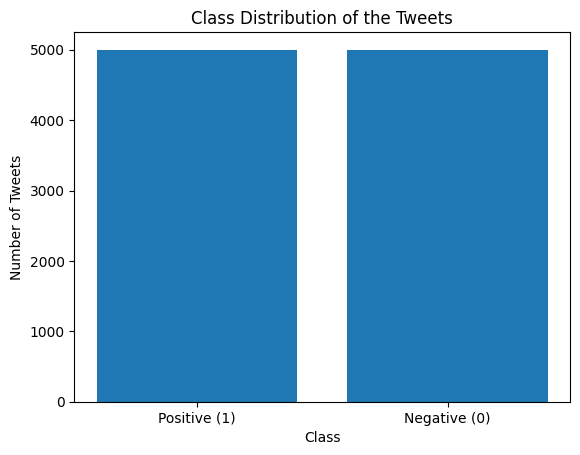

In [ ]:
# Your Code Here
class_distri = tweets_df['label'].value_counts()
print(class_distri)

plt.bar(class_distri.index, class_distri.values, tick_label=["Negative (0)", "Positive (1)"])
plt.title("Class Distribution of the Tweets")
plt.xlabel("Class")
plt.ylabel("Number of Tweets")
plt.show()

**1.5) Create a development & test split (80/20 ratio):**

In [ ]:
# Your Code Here
train_df, test_df = train_test_split(tweets_df, test_size=0.2, random_state=42, stratify=tweets_df['label'])

#### **Data preprocessing**
We will do some data preprocessing before we tokenize the data. We will remove `#` symbol, hyperlinks, stop words & punctuations from the data. You can use the `re` package in python to find and replace these strings.

**1.6) Replace the `#` symbol with '' in every tweet**

In [ ]:
# Your Code Here
tweets_df['tweet'] = tweets_df['tweet'].str.replace('#', '')

**1.7) Replace hyperlinks with '' in every tweet**

In [ ]:
# Your Code Here
tweets_df['tweet'] = tweets_df['tweet'].str.replace(r'http\S+|www\S+', '', regex=True)

**1.8) Remove all stop words**

In [ ]:
# Your Code Here
vector_stop_words = CountVectorizer(stop_words='english')
dev_X = vector_stop_words.fit_transform(train_df['tweet'])
test_X = vector_stop_words.transform(test_df['tweet'])
dev_X, test_X

(<8000x17244 sparse matrix of type '<class 'numpy.int64'>'
 	with 47507 stored elements in Compressed Sparse Row format>,
 <2000x17244 sparse matrix of type '<class 'numpy.int64'>'
 	with 8544 stored elements in Compressed Sparse Row format>)

**1.9) Remove all punctuations**

In [ ]:
# Your Code Here
# Since CountVectorizer already removes punctuations, there's no need for additional preprocessing in this step.
# We can verify the vocabulary to ensure punctuation removal.
print(f"Sample features: {list(vector_stop_words.vocabulary_.keys())[:10]}")

Sample features: ['cooldigangana', 'diganganas', 'want', 'attend', 'ur', 'birthday', 'plssssssssssssssss', 'thanks', 'jen', 'weekend']


**1.10) Apply stemming on the development & test datasets using Porter algorithm**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('all')
print(nltk.data.path)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru 

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to /root/nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to /root/nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet2022 to /root/nltk_data...
[nltk_data]    |   Package wordnet2022 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to /root/nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to /root/nltk_data...
[nltk_data]    |   Package words is already up-to-date!
[nltk_data]    | Downloading package ycoe to /root/nltk_data...
[nltk_data]    |   Package ycoe is already up-to-date!
[nltk_data]    | 
[nltk_data]  Done downloa

True

In [ ]:
# Your Code Here
stemmer = PorterStemmer()
def apply_stemming(tweet):
    words = word_tokenize(tweet)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

train_df['stemmed_tweet'] = train_df['tweet'].apply(apply_stemming)
test_df['stemmed_tweet'] = test_df['tweet'].apply(apply_stemming)

dev_X = vector_stop_words.fit_transform(train_df['stemmed_tweet'])
test_X = vector_stop_words.transform(test_df['stemmed_tweet'])

print(f"Sample features after stemming: {list(vector_stop_words.vocabulary_.keys())[:10]}")

Sample features after stemming: ['cooldigangana', 'digangana', 'want', 'attend', 'ur', 'birthday', 'plssssssssssssssss', 'thank', 'jen', 'weekend']


#### **Model training**

**1.11) Create bag of words features for each tweet in the development dataset**

In [ ]:
# Your Code Here
vector = CountVectorizer()
dev_X = vector.fit_transform(train_df['stemmed_tweet'])
test_X = vector.transform(test_df['stemmed_tweet'])

**1.12) Train a Logistic Regression model on the development dataset**

In [ ]:
# Your Code Here
lr_bow = LogisticRegression(max_iter=1000, random_state=42)
lr_bow.fit(dev_X, train_df['label'])

LogisticRegression(max_iter=1000, random_state=42)

**1.13) Create TF-IDF features for each tweet in the development dataset**

In [ ]:
# Your Code Here
vector = TfidfVectorizer()
dev_X = vector.fit_transform(train_df['stemmed_tweet'])
test_X = vector.transform(test_df['stemmed_tweet'])

**1.14) Train the Logistic Regression model on the development dataset with TF-IDF features**

In [ ]:
# Your Code Here
lr_tf = LogisticRegression(max_iter=1000, random_state=42)
lr_tf.fit(dev_X, train_df['label'])

LogisticRegression(max_iter=1000, random_state=42)

**1.15) Compare the performance of the two models on the test dataset using a classification report and the scores obtained. Explain the difference in results obtained.**

In [ ]:
# Your Code Here
bow_pred = lr_bow.predict(test_X)
bow_per = lr_bow.score(test_X, test_df['label'])

tfidf_pred = lr_tf.predict(test_X)
tfidf_per = lr_tf.score(test_X, test_df['label'])

print(f"Accuracy of Logistic Regression with Bag-of-Words features: {bow_per:.4f}")
print(f"Accuracy of Logistic Regression with TF-IDF features: {tfidf_per:.4f}")

print("\nClassification Report: Bag of Words Model")
print(classification_report(test_df['label'], bow_pred, digits=4))

print("\nClassification Report: TF-IDF Model")
print(classification_report(test_df['label'], tfidf_pred, digits=4))

Accuracy of Logistic Regression with Bag-of-Words features: 0.7490
Accuracy of Logistic Regression with TF-IDF features: 0.7590

Classification Report: Bag of Words Model
              precision    recall  f1-score   support

           0     0.7024    0.8640    0.7749      1000
           1     0.8234    0.6340    0.7164      1000

    accuracy                         0.7490      2000
   macro avg     0.7629    0.7490    0.7456      2000
weighted avg     0.7629    0.7490    0.7456      2000


Classification Report: TF-IDF Model
              precision    recall  f1-score   support

           0     0.7544    0.7680    0.7611      1000
           1     0.7637    0.7500    0.7568      1000

    accuracy                         0.7590      2000
   macro avg     0.7591    0.7590    0.7590      2000
weighted avg     0.7591    0.7590    0.7590      2000



*Explanation here: The accuracy of TF-IDF is higher, probably because it better captures words that are less frequenct but more informative than BOW model. For class 0 in classification report, BOW model has lower precision, meaning it has more false positives, whereas BOW model has higher recall, meaning that it captures most of the true negatives. For class 1, BOW model has a higher precision but significantly lower recall, contributing to the fact that TF-IDF overall handles better of true positives than BOW model. The key reason for the difference is that BOW model treats all words equally, so some uninformative words may dominate the feature space, reducing its ability to distinguish between classes. Whereas, TF-IDF model assigns higher weight to less frequent but more informative words, so that the model could better distinguish between classes and better balance the precision and recall, so to improve F1 score.  